In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from env import user, password, host

import aquire
import prep
import model

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

# Aquire:
### Original zillow database was too large to import , therefore it's much more efficient to observe and prep the data through a SQL statement than it is to import it all into python and observe through pandas.

Aquired first 10 rows to observe number of columns and types of data in each column.

In [2]:
df_first_10_rows = aquire.aquire_database()

In [3]:
df_first_10_rows.shape

(10, 59)

In [4]:
df_first_10_rows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 59 columns):
id                              10 non-null int64
parcelid                        10 non-null int64
airconditioningtypeid           0 non-null object
architecturalstyletypeid        0 non-null object
basementsqft                    0 non-null object
bathroomcnt                     10 non-null float64
bedroomcnt                      10 non-null float64
buildingclasstypeid             5 non-null float64
buildingqualitytypeid           3 non-null float64
calculatedbathnbr               0 non-null object
decktypeid                      0 non-null object
finishedfloor1squarefeet        0 non-null object
calculatedfinishedsquarefeet    6 non-null float64
finishedsquarefeet12            0 non-null object
finishedsquarefeet13            0 non-null object
finishedsquarefeet15            6 non-null float64
finishedsquarefeet50            0 non-null object
finishedsquarefeet6             0 non-nu

# Prep:
### Wrangle FIPS data in order to identify the 3 counties in the dataset.
(refer to prep.py for info on how data was wrangled and cleaned)

In [5]:
county_df = prep.wrangle_county_fips()

In [6]:
# 3 Different Counties:  Los Angeles County, Orange County, and Ventura County
county_df

,County
fips_number,
6037,Los Angeles County
6059,Orange County
6111,Ventura County


### Data Visualizations:  Distribution of tax rates by County

In [7]:
zillow_df = prep.wrangle_zillow_data()

In [8]:
zillow_df['property_tax_rate'] = (zillow_df.property_tax / zillow_df.house_value) * 100

In [9]:
zillow_df.head()

,bedrooms,bathrooms,square_feet,property_tax,house_value,property_description,property_id,lot_size,county,property_tax_rate
0,4.0,2.0,1604.0,6089.82,498347.0,Single Family Residential,261.0,6211.0,Los Angeles County,1.222004
1,3.0,3.0,2384.0,6679.55,549917.0,Single Family Residential,261.0,9109.0,Los Angeles County,1.214647
2,3.0,2.0,1574.0,3876.31,235272.0,Single Family Residential,261.0,7538.0,Los Angeles County,1.647587
3,2.0,2.0,1619.0,4206.15,340000.0,Single Family Residential,261.0,111564.0,Los Angeles County,1.237103
4,2.0,3.0,2408.0,24353.42,2017254.0,Single Family Residential,261.0,10497.0,Los Angeles County,1.207256


In [10]:
la_county_tax_rates = zillow_df.property_tax_rate[zillow_df.county == 'Los Angeles County']
orange_county_tax_rates = zillow_df.property_tax_rate[zillow_df.county == 'Orange County']
ventura_county_tax_rates = zillow_df.property_tax_rate[zillow_df.county == 'Ventura County']
zillow_df.head()

,bedrooms,bathrooms,square_feet,property_tax,house_value,property_description,property_id,lot_size,county,property_tax_rate
0,4.0,2.0,1604.0,6089.82,498347.0,Single Family Residential,261.0,6211.0,Los Angeles County,1.222004
1,3.0,3.0,2384.0,6679.55,549917.0,Single Family Residential,261.0,9109.0,Los Angeles County,1.214647
2,3.0,2.0,1574.0,3876.31,235272.0,Single Family Residential,261.0,7538.0,Los Angeles County,1.647587
3,2.0,2.0,1619.0,4206.15,340000.0,Single Family Residential,261.0,111564.0,Los Angeles County,1.237103
4,2.0,3.0,2408.0,24353.42,2017254.0,Single Family Residential,261.0,10497.0,Los Angeles County,1.207256


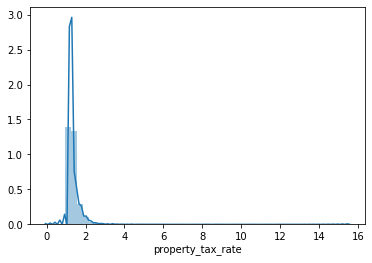

In [11]:
la_county_tax_rates_distplot = sns.distplot(la_county_tax_rates)

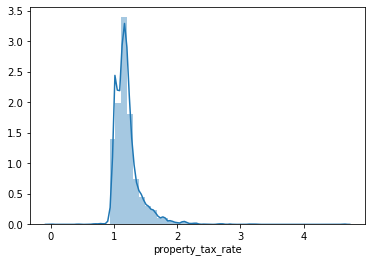

In [12]:
orange_county_tax_rates_displot = sns.distplot(orange_county_tax_rates)

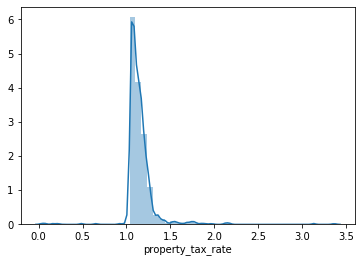

In [13]:
ventura_county_tax_rates_displot = sns.distplot(ventura_county_tax_rates)

### Using prep.py, extract the zillow database data for houses that were listed as 'Single Family Residential' and purchased between 05-01-2017 and 06-30-2017.

In [14]:
zillow_df = prep.wrangle_zillow_data()

### Bedroom count, bathroom count, and square footage of the house were the first choice of features in order to predict the value of the house.  After the first iteration, lot size minus the house square footage was used in order to compare the lot size to the size of the house, and thus increase the explained sum of squares.

Data Dictionary for column names (original SQL column name = alias).

bedroomcnt = bedrooms

bathroomcnt = bathrooms

taxamount = property_tax

taxvaluedollarcnt = house_value

propertylandusedesc = property_description

propertylandusetypeid = property_id

lotsizesquarefeet = lot_size

lot_size_minus_sqft = lot_size - square_feet

property_tax_rate = property_tax / house_value


#### Add property tax rate column by dividing property tax by house_value

In [15]:
zillow_df['property_tax_rate'] = (zillow_df.property_tax / zillow_df.house_value) * 100

In [16]:
zillow_df.head()

,bedrooms,bathrooms,square_feet,property_tax,house_value,property_description,property_id,lot_size,county,property_tax_rate
0,4.0,2.0,1604.0,6089.82,498347.0,Single Family Residential,261.0,6211.0,Los Angeles County,1.222004
1,3.0,3.0,2384.0,6679.55,549917.0,Single Family Residential,261.0,9109.0,Los Angeles County,1.214647
2,3.0,2.0,1574.0,3876.31,235272.0,Single Family Residential,261.0,7538.0,Los Angeles County,1.647587
3,2.0,2.0,1619.0,4206.15,340000.0,Single Family Residential,261.0,111564.0,Los Angeles County,1.237103
4,2.0,3.0,2408.0,24353.42,2017254.0,Single Family Residential,261.0,10497.0,Los Angeles County,1.207256


In [17]:
zillow_df['lot_size_minus_sqft'] = zillow_df['lot_size'] - zillow_df['square_feet']

In [18]:
zillow_df.head()

,bedrooms,bathrooms,square_feet,property_tax,house_value,property_description,property_id,lot_size,county,property_tax_rate,lot_size_minus_sqft
0,4.0,2.0,1604.0,6089.82,498347.0,Single Family Residential,261.0,6211.0,Los Angeles County,1.222004,4607.0
1,3.0,3.0,2384.0,6679.55,549917.0,Single Family Residential,261.0,9109.0,Los Angeles County,1.214647,6725.0
2,3.0,2.0,1574.0,3876.31,235272.0,Single Family Residential,261.0,7538.0,Los Angeles County,1.647587,5964.0
3,2.0,2.0,1619.0,4206.15,340000.0,Single Family Residential,261.0,111564.0,Los Angeles County,1.237103,109945.0
4,2.0,3.0,2408.0,24353.42,2017254.0,Single Family Residential,261.0,10497.0,Los Angeles County,1.207256,8089.0


In [19]:
zillow_df = zillow_df[zillow_df.loc[:]!=0].dropna()

# Split & Scale:
### Prepare data to be split and scaled by selecting the columns to be used.

In [20]:
df = zillow_df[['bedrooms', 'bathrooms', 'square_feet', 'lot_size_minus_sqft', 'house_value']]
X = zillow_df[['bedrooms', 'bathrooms', 'square_feet', 'lot_size_minus_sqft']]
y = zillow_df[['house_value']]

In [21]:
import split_scale

### In this case, the standard_scaler function was used from the sklearn library and is located in the split_scale.py file

In [22]:
train, test = split_scale.split_my_data(df)

In [23]:
scaler, train_scaled, test_scaled = split_scale.iqr_robust_scaler(train, test)

In [24]:
train_scaled.head()

,bedrooms,bathrooms,square_feet,lot_size_minus_sqft,house_value
11303,-1.0,0.0,-0.508493,-0.050623,-0.750403
7952,0.0,-1.0,0.601911,0.483189,0.323339
9828,1.0,2.0,2.188960,4.323007,2.312186
9382,-1.0,1.0,1.564756,0.142803,12.105417
13102,1.0,0.0,0.164544,0.564790,0.046723


In [25]:
X_train_scaled = train_scaled[['bedrooms', 'bathrooms', 'square_feet', 'lot_size_minus_sqft']]
y_train = train[['house_value']]

In [26]:
X_test = test_scaled.drop(columns='house_value')
y_test = test[['house_value']]

### Below, a pairplot and a heatmap were used as visualizations in order to see the relationships between the trained and scaled data.  

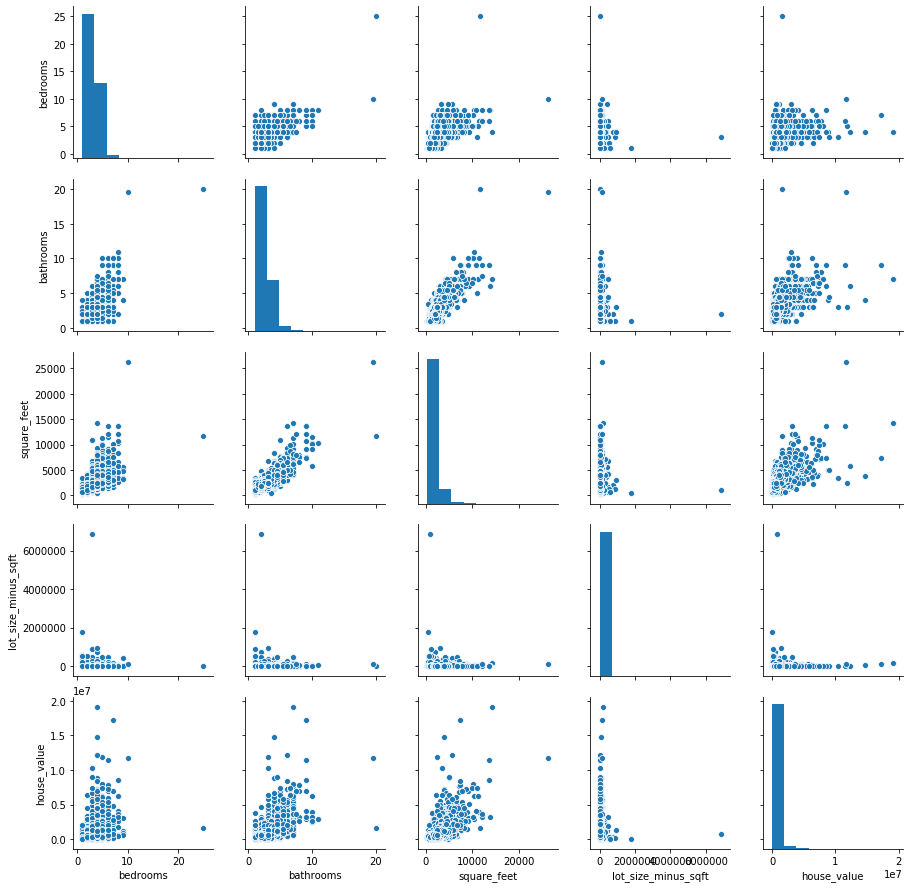

In [27]:
sns.pairplot(df)

(0, 4)

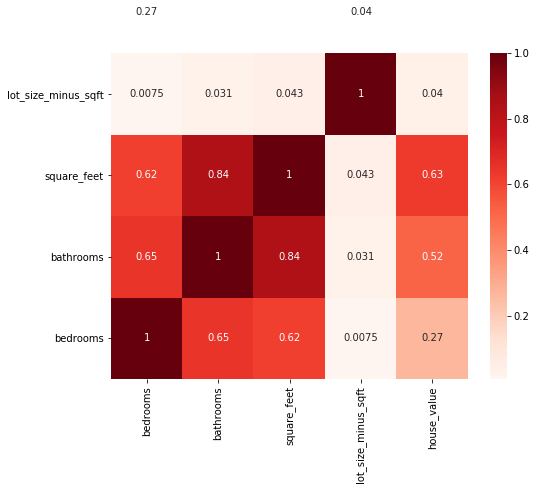

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(), cmap='Reds', annot=True)
plt.ylim(0, 4)

### Using sm.OLS from the statsmodels.api library, a summary can be printed out showing the R-squared value, p-values, coefficients for our regression line, etc.

In [40]:
import statsmodels.api as sm

res = sm.OLS(y_train, X_train_scaled).fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            house_value   R-squared (uncentered):                   0.414
Model:                            OLS   Adj. R-squared (uncentered):              0.414
Method:                 Least Squares   F-statistic:                              2244.
Date:                Mon, 21 Oct 2019   Prob (F-statistic):                        0.00
Time:                        01:46:58   Log-Likelihood:                     -1.8724e+05
No. Observations:               12705   AIC:                                  3.745e+05
Df Residuals:                   12701   BIC:                                  3.745e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
bedrooms            -6.759e+04   7615.318     -8.875      0.000   -8.25e+04   -5.27e+04
bathrooms            3627.4764   1.05e+04      0.346      0.729   -1.69e+04    2.42e+04
square_feet          5.177e+05   9964.879     51.954      0.000    4.98e+05    5.37e+05
lot_size_minus_sqft   902.2131    213.921      4.217      0.000     482.895    1321.531
==============================================================================
Omnibus:                    15912.756   Durbin-Watson:                   1.349
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7688985.950
Skew:                           6.409   Prob(JB):                         0.00
Kurtosis:                     122.835   Cond. No.                         63.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Using the sklearn library, the LinearRegression function was used to create the regression object.

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lm1 = LinearRegression()

#### Predicting off of the test values to evaluate our models performance

In [31]:
lm1.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
lm1.coef_

array([[-1.44664561e+05,  3.68568342e+04,  4.48754710e+05,
         2.17045853e+02]])

In [33]:
predictions = lm1.predict(X_test)

#### Scatter plot of the Predicted Values vs Real Test Values

In [41]:
# plt.scatter(y_test, predictions)
# plt.xlabel('y_test(True Values)')
# plt.ylabel('Predicted Values')

pd.DataFrame({'actual': y_train,
              'lm1': y_.ravel(),
              'lm_baseline': y_pred_baseline.ravel()})\
.melt(id_vars=['actual'], var_name='model', value_name='prediction')\
.pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')
plt.plot([min, max],[min, max], c='black', ls=':')
plt.ylim(min, max)
plt.xlim(min, max)
plt.title('Predicted vs Actual Final Grade')

NameError: name 'y_pred_lm1' is not defined

### Evaluating Model Performance: Mean squared error and root mean squared error

In [35]:
print('MSE ', metrics.mean_squared_error(y_test,predictions))
print('RMSE ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MSE  204910246134.9187
RMSE  452670.1294926789


### R-squared

In [36]:
metrics.explained_variance_score(y_test,predictions)

0.46604442027567483

### Plotting Residuals to make sure it is normally distributed

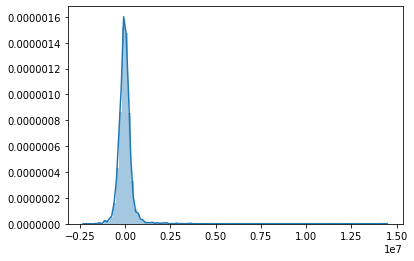

In [38]:
sns.distplot((y_test-predictions), bins=100)

## Conclusions

Being that I ended up with an R-sqaured value of only .47(meaning only 47% of the error is explained by this model), the model is in need of a lot of improvement.  This could be due to the possible multicollinearity of my 4 features. A possible solution could be to use different scaling function and/or feature engineering techniques to remove the collinearity of the features.